In [5]:
import yfinance
import matplotlib.pyplot as plt
import pandas as pd
import gdown
import numpy as np
import seaborn as sns

In [16]:
sp500 = pd.read_csv("https://raw.githubusercontent.com/Lucas123if/Dados_projeto_entrada/refs/heads/main/sp500_mensal.csv", parse_dates=['Date'], index_col='Date').add_prefix('sp500_')
bvsp = pd.read_csv("https://raw.githubusercontent.com/Lucas123if/Dados_projeto_entrada/refs/heads/main/bvsp_mensal.csv", parse_dates=['Date'], index_col='Date').add_prefix('bvsp_')
nikkei = pd.read_csv("https://raw.githubusercontent.com/Lucas123if/Dados_projeto_entrada/refs/heads/main/nikkei_mensal.csv", parse_dates=['Date'], index_col='Date').add_prefix('nikkei_')
rts = pd.read_csv("https://raw.githubusercontent.com/Lucas123if/Dados_projeto_entrada/refs/heads/main/rts_mensal.csv", parse_dates=['Date'], index_col='Date').add_prefix('rts_')
sensex = pd.read_csv("https://raw.githubusercontent.com/Lucas123if/Dados_projeto_entrada/refs/heads/main/sensex_mensal.csv", parse_dates=['Date'], index_col='Date').add_prefix('sensex_')
shangai = pd.read_csv("https://raw.githubusercontent.com/Lucas123if/Dados_projeto_entrada/refs/heads/main/shanghai_composite_mensal.csv", parse_dates=['Date'], index_col='Date').add_prefix('shangai_')

In [54]:
for df in [sp500, bvsp, nikkei, rts, sensex, shangai]:
    # Converte para datetime com UTC
    df.index = pd.to_datetime(df.index, utc=True)

    # Remove o timezone (fica tz-naive)
    df.index = df.index.tz_convert(None)

    # Converte para período mensal (remove hora, deixa só ano-mês)
    df.index = df.index.to_period('M').to_timestamp()

In [55]:
df = sp500.merge(bvsp, left_index=True, right_index=True, how='outer').merge(nikkei, left_index=True, right_index=True, how='outer').merge(rts, left_index=True, right_index=True, how='outer').merge(sensex, left_index=True, right_index=True, how='outer').merge(shangai, left_index=True, right_index=True, how='outer')
df = df.map(lambda x: str(x).replace(',', '') if isinstance(x, str) else x)
df = df.apply(pd.to_numeric, errors='coerce')
df.head(20)

,sp500_Open,sp500_High,sp500_Low,sp500_Close,sp500_Volume,sp500_Dividends,sp500_Stock Splits,bvsp_Open,bvsp_High,bvsp_Low,...,sensex_Volume,sensex_Dividends,sensex_Stock Splits,shangai_Open,shangai_High,shangai_Low,shangai_Close,shangai_Volume,shangai_Dividends,shangai_Stock Splits
Date,,,,,,,,,,,,,,,,,,,,,
1995-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-01,615.929993,636.179993,597.289978,636.020020,9.188050e+09,0.0,0.0,4299.000000,5171.600098,4299.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-02-01,636.020020,664.229980,633.710022,640.429993,8.749960e+09,0.0,0.0,5151.500000,5410.899902,4939.600098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-01,640.429993,656.969971,627.630005,645.500000,8.984200e+09,0.0,0.0,5120.799805,5224.399902,4595.600098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-04-01,645.500000,656.679993,624.140015,654.169983,8.875580e+09,0.0,0.0,5022.399902,5175.200195,4831.200195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-05-01,654.169983,681.099976,630.070007,669.119995,8.921140e+09,0.0,0.0,5191.500000,5764.200195,5097.299805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-06-01,669.119995,680.320007,658.750000,670.630005,7.930840e+09,0.0,0.0,5725.799805,6278.899902,5397.799805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-07-01,670.630005,675.880005,605.880005,639.950012,8.849860e+09,0.0,0.0,6043.899902,6713.200195,5879.399902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-08-01,639.950012,670.679993,639.489990,651.989990,7.380320e+09,0.0,0.0,6308.299805,6400.799805,6016.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Agora eu vou calcular as correlações. Vou primeiro calcular as correlações entre preços de abertura, de fechamento, etc... para cada mercado. Depois que cada correlação for dada, tomo a média das correlações entre cada mercado e chamo isso de correlação entre os dois mercados. Em finanças, é mais comum usar só o preço de fechamento para cálculo de correlação, mas usar os highs e lows também pode nos dar mais informações sobre como cada mercado está correlacionado no tempo. 

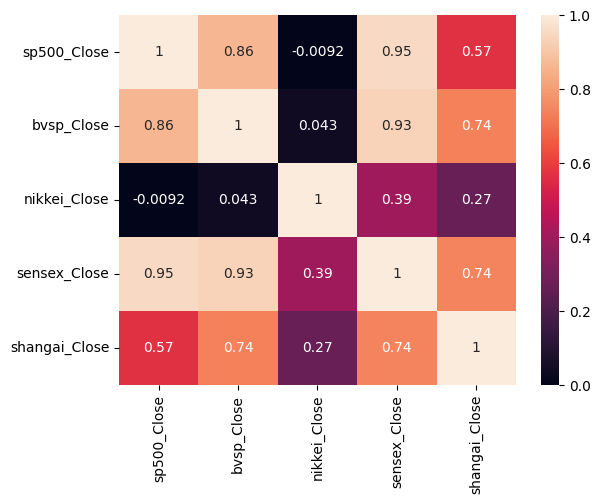

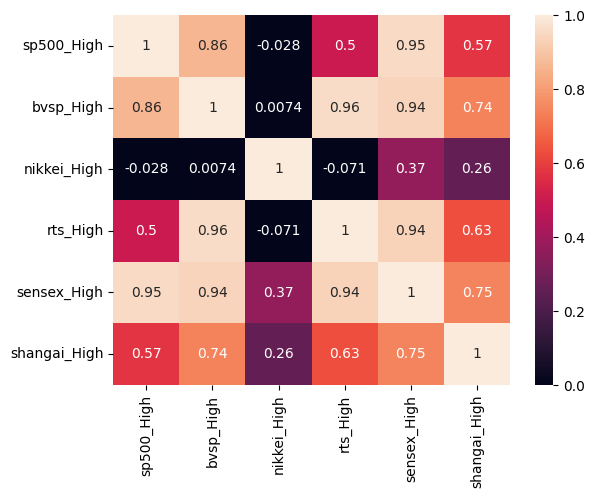

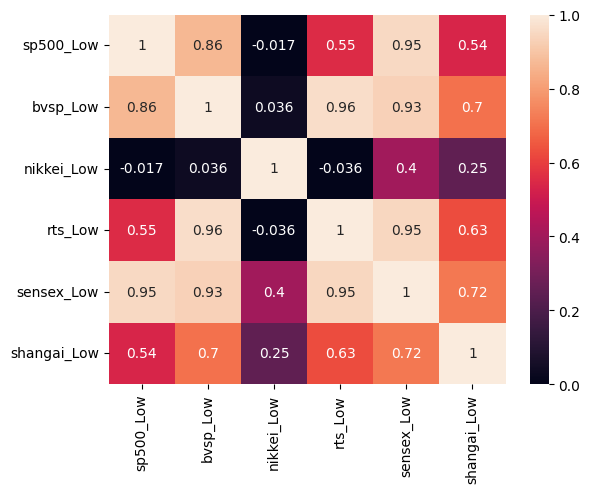

In [57]:
df_close = df.filter(like='_Close')
df_high = df.filter(like='_High')
df_low = df.filter(like='_Low')

corr_close = df_close.corr()
corr_high = df_high.corr()
corr_low = df_low.corr()

ax = sns.heatmap(corr_close, vmin=0, vmax=1, annot = True)
plt.show()

ax = sns.heatmap(corr_high, vmin=0, vmax=1, annot = True)
plt.show()

ax = sns.heatmap(corr_low, vmin=0, vmax=1, annot = True)
plt.show()

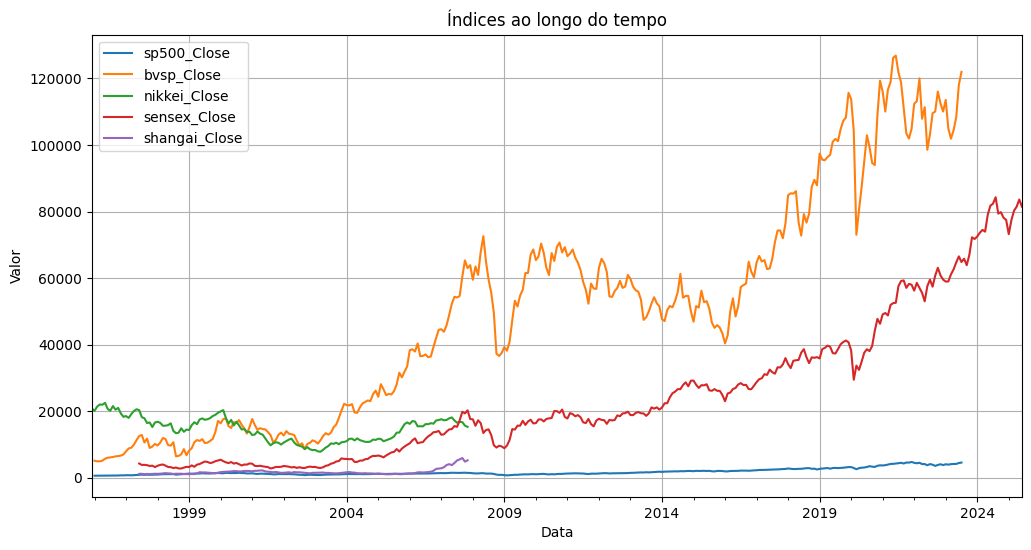

In [58]:
df_close.plot(figsize=(12, 6))
plt.title("Índices ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Valor")
plt.grid(True)
plt.legend(loc='best')
plt.show()

Isso claramente não faz sentido, já que, dentre todos os índices, o sp500 é o menor. 

C:\Users\Lucas Miranda\AppData\Local\Temp\ipykernel_27160\2609110112.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_returns = df.pct_change()


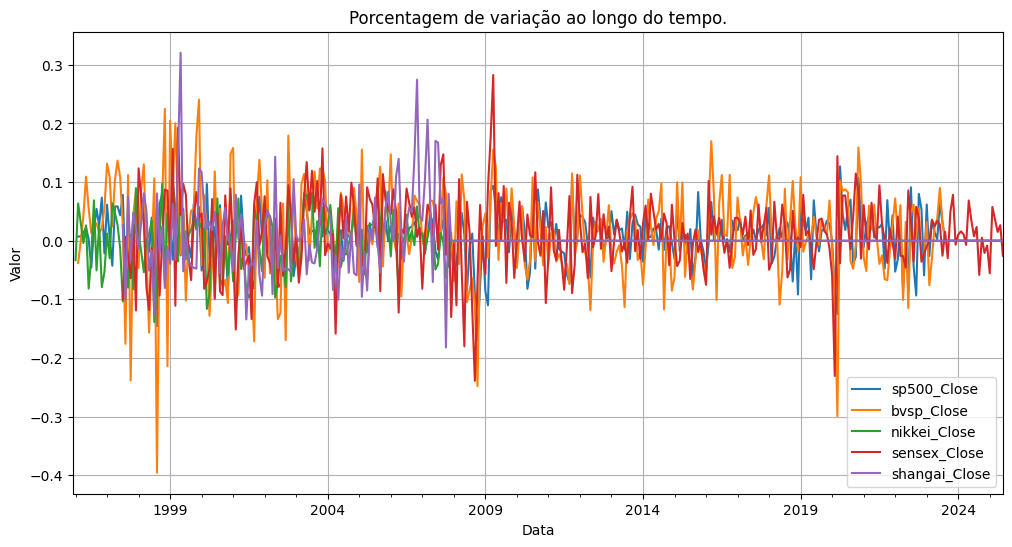

In [60]:
df_returns = df.pct_change()
df_close1 = df_returns.filter(like='_Close')
df_close1.plot(figsize=(12, 6))
plt.title("Porcentagem de variação ao longo do tempo.")
plt.xlabel("Data")
plt.ylabel("Valor")
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [61]:
df.to_csv("df_projeto_de_entrada.csv")